In [1]:
# %pip install matplotlib
# %pip install seaborn
# %pip install tabulate

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tabulate import tabulate
import math 

url_events = "https://flipquest-9db7e-default-rtdb.firebaseio.com/events.json"
url_sessions = "https://flipquest-9db7e-default-rtdb.firebaseio.com/sessions.json"

events_data = requests.get(url_events).json()
sessions_data = requests.get(url_sessions).json()


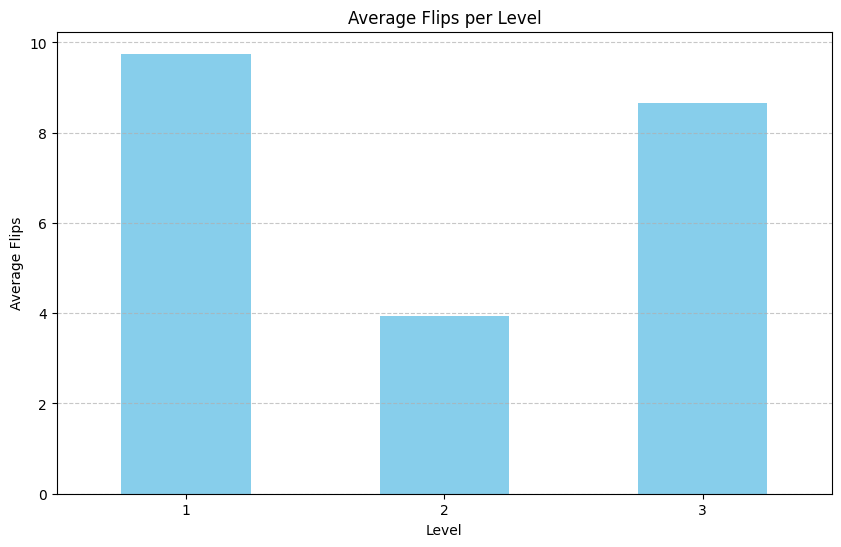

In [3]:
flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')  
    session_id = event.get('session_id')  
    flips = event.get('flips')  
    finished = event.get('finish')  
    
    if level_index in [4, 5, 6]:  
            if (
                flips is not None  
                and not (isinstance(flips, str) and flips.lower() in ['nan', 'na'])  
                and not math.isnan(flips)  
            ):
                level = level_index - 3
                flips_per_level.append((level, flips))


df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])
df_flips = df_flips.sort_values(by='Level')


avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()

plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

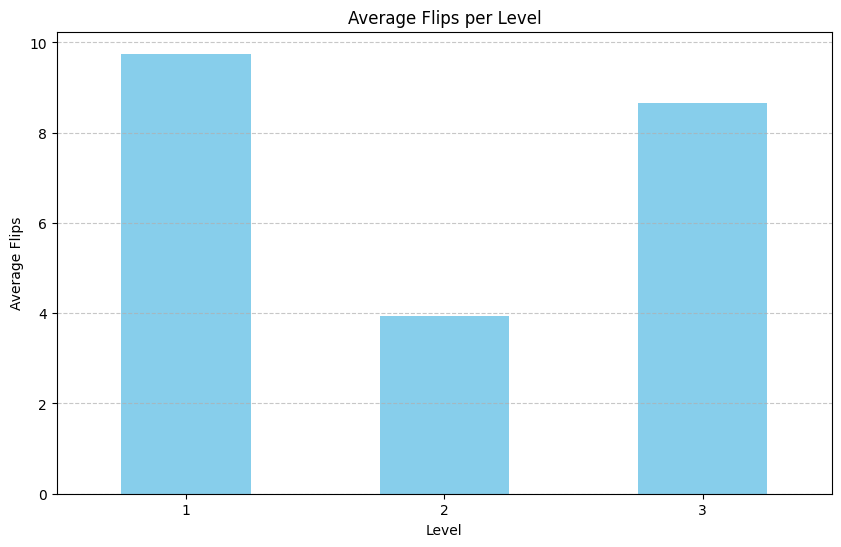

In [4]:
flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')
    session_id = event.get('session_id')  
    
    if level_index in [4, 5, 6]:
        if not (level_index == 4 and session_id == "ccbf94f7-2754-4870-a460-7fcaa6fa1070"):
            level = level_index - 3
            flips = event.get('flips')
            flips_per_level.append((level, flips))

df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])

avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()


plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

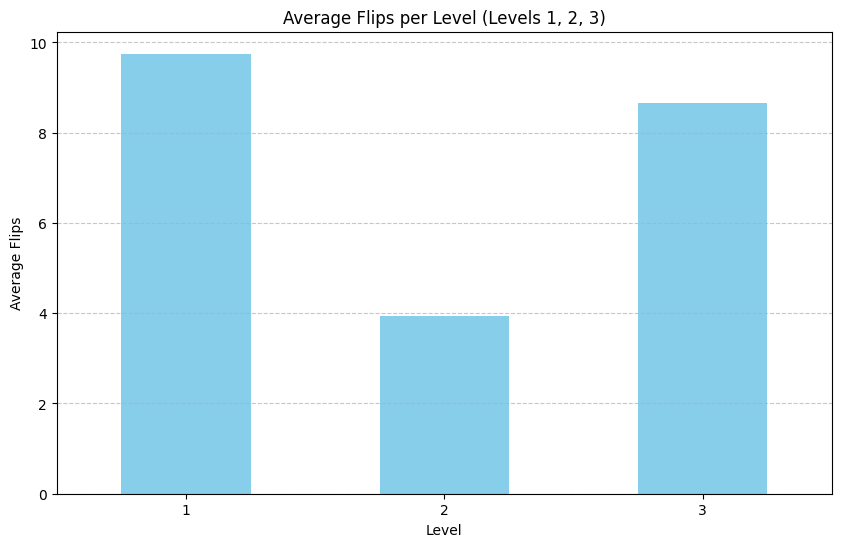

In [5]:
flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        flips = event.get('flips')
        flips_per_level.append((level, flips))


df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])
avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()


plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level (Levels 1, 2, 3)")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


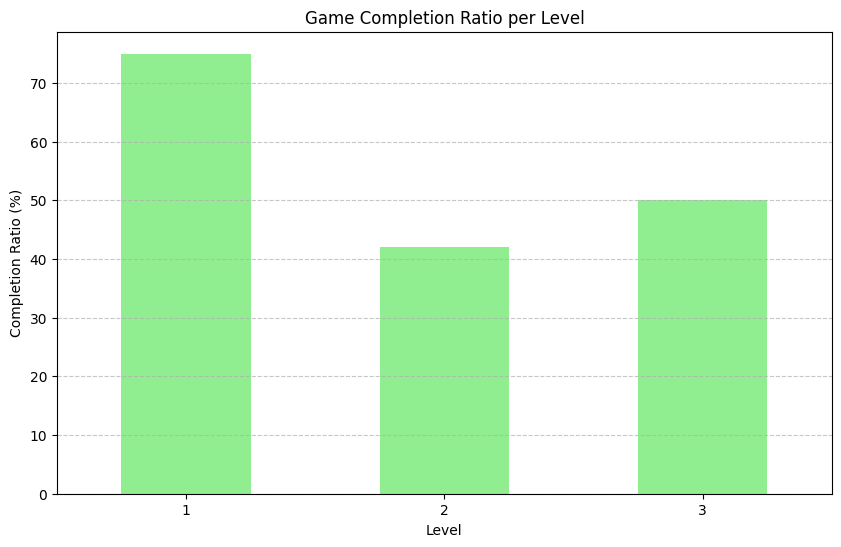

In [6]:
completion_data = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        completed = event.get('finish')
        completion_data.append((level, completed))
        
df_completion = pd.DataFrame(completion_data, columns=['Level', 'Completed'])
df_completion = df_completion.dropna(subset=['Completed'])

completion_ratio = df_completion.groupby('Level')['Completed'].mean() * 100  

plt.figure(figsize=(10, 6))
completion_ratio.plot(kind='bar', color='lightgreen')
plt.title("Game Completion Ratio per Level")
plt.xlabel("Level")
plt.ylabel("Completion Ratio (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


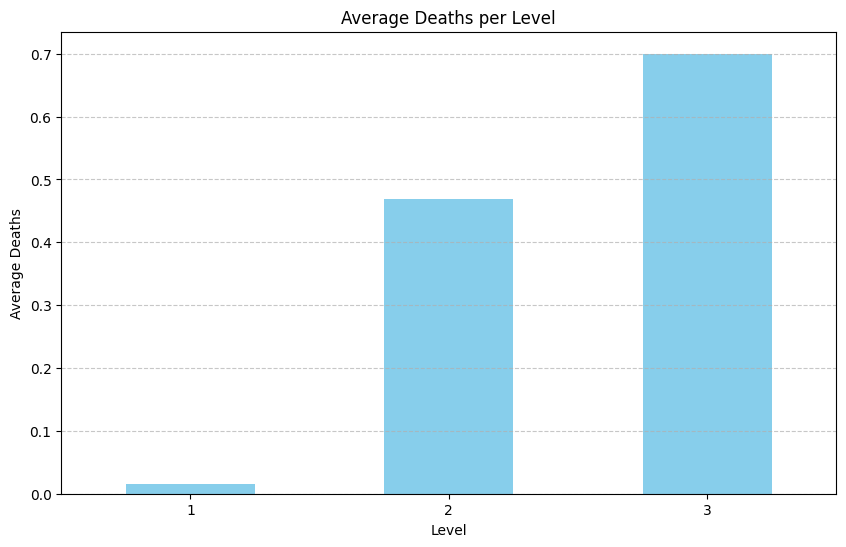

In [7]:
deaths_per_level = []
for session in sessions_data.values():
    crossed_checkpoints = session.get('crossedCheckpoints', [])
    if isinstance(crossed_checkpoints, list):
        for checkpoint in crossed_checkpoints:
            checkpoint_id = checkpoint.get('checkpointID', '')
            
            match = re.match(r'(\d+)[_l](\d+)', checkpoint_id)
            if match:
                level = match.group(1)  
                deaths = checkpoint.get('hitCount', 0)  
                deaths_per_level.append((int(level), deaths))  
                
df_deaths = pd.DataFrame(deaths_per_level, columns=['Level', 'Deaths'])
avg_deaths_per_level = df_deaths.groupby('Level')['Deaths'].mean()

plt.figure(figsize=(10, 6))
avg_deaths_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Average Deaths")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


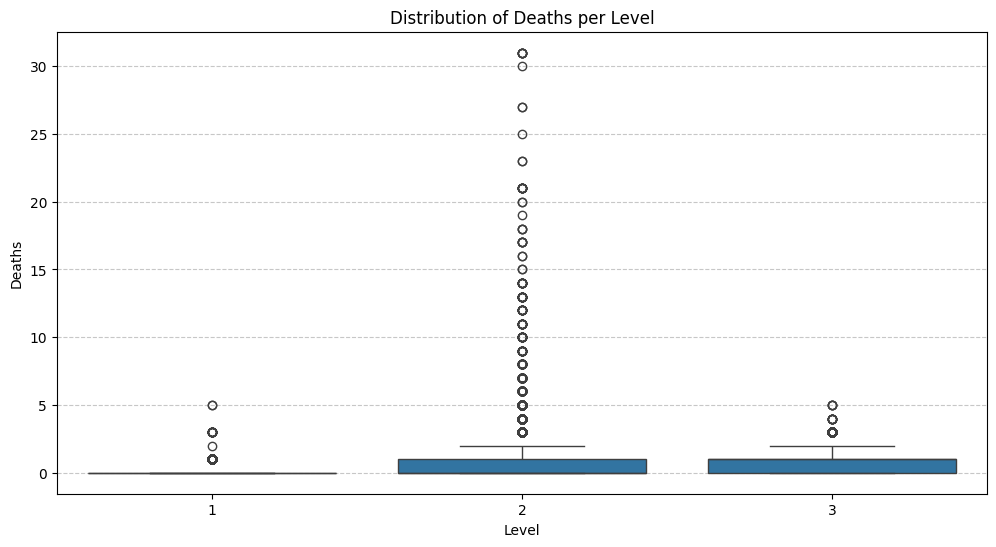

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Deaths', data=df_deaths)
plt.title("Distribution of Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Deaths")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

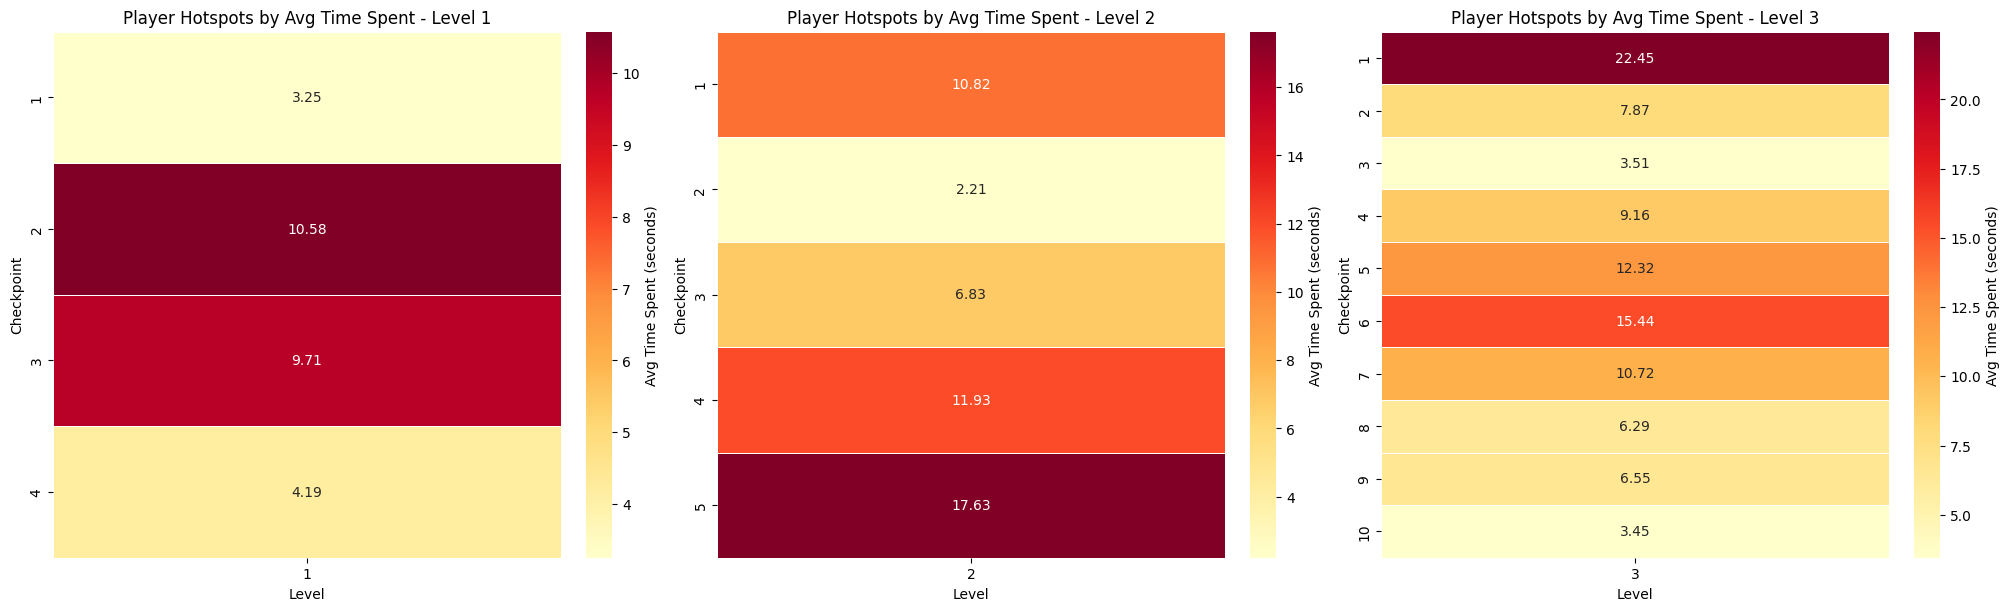

In [9]:
time_spent_per_checkpoint = {}
checkpoint_counts = {}

for session in sessions_data.values():
    crossed_checkpoints = session.get('crossedCheckpoints', [])
    if isinstance(crossed_checkpoints, list):
        for checkpoint in crossed_checkpoints:
            checkpoint_id = checkpoint.get('checkpointID', '')
            time_taken = checkpoint.get('timeTaken', 0)  

            
            match = re.match(r'(\d+)[_l](\d+)', checkpoint_id)
            if match:
                level = int(match.group(1))
                checkpoint_num = int(match.group(2))

                
                key = (level, checkpoint_num)
                time_spent_per_checkpoint[key] = time_spent_per_checkpoint.get(key, 0) + time_taken
                checkpoint_counts[key] = checkpoint_counts.get(key, 0) + 1


avg_time_per_checkpoint = {
    key: time_spent_per_checkpoint[key] / checkpoint_counts[key] for key in time_spent_per_checkpoint
}

df_avg_time_spent = pd.DataFrame(
    [(level, checkpoint, avg_time) for (level, checkpoint), avg_time in avg_time_per_checkpoint.items()],
    columns=['Level', 'Checkpoint', 'AvgTimeSpent']
)

fig, axs = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

for idx, level in enumerate([1, 2, 3]):
    level_data = df_avg_time_spent[df_avg_time_spent['Level'] == level].pivot(index='Checkpoint', columns='Level', values='AvgTimeSpent').fillna(0)
    
    sns.heatmap(
        level_data, annot=True, fmt='.2f', cmap='YlOrRd', linewidths=.5, cbar_kws={'label': 'Avg Time Spent (seconds)'},
        ax=axs[idx]
    )
    axs[idx].set_title(f"Player Hotspots by Avg Time Spent - Level {level}")
    axs[idx].set_xlabel("Level")
    axs[idx].set_ylabel("Checkpoint")

plt.show()

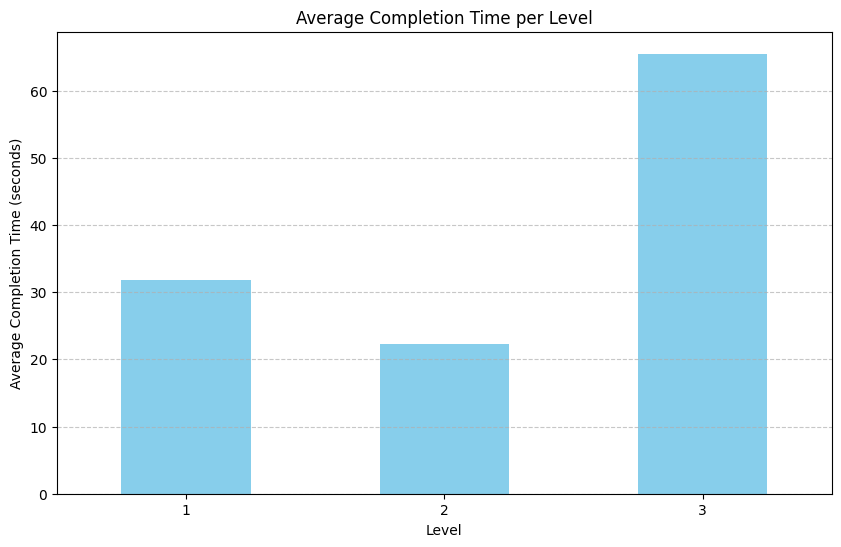

In [10]:

completion_times = []
for event in events_data.values():
    level_index = event.get('level_index')
    completion_time = event.get('completion_time')
    
    if level_index in [4, 5, 6] and completion_time is not None:
        
        adjusted_level = level_index - 3
        completion_times.append((adjusted_level, completion_time))

df_completion_times = pd.DataFrame(completion_times, columns=['Level', 'CompletionTime'])
avg_completion_time = df_completion_times.groupby('Level')['CompletionTime'].mean()

plt.figure(figsize=(10, 6))
avg_completion_time.plot(kind='bar', color='skyblue')
plt.title("Average Completion Time per Level")
plt.xlabel("Level")
plt.ylabel("Average Completion Time (seconds)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()